<a href="https://colab.research.google.com/github/budukhaditya/Pixeltest/blob/main/Kaggle_PROJECT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Pixeltest/playground-series-s5e4/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Pixeltest/playground-series-s5e4/test.csv')

print("Dataset shape",df.shape)
print("Test dataset shape",df_test.shape)

df.head()

Dataset shape (750000, 12)
Test dataset shape (250000, 11)


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [ ]:
df.dtypes

,0
id,int64
Podcast_Name,object
Episode_Title,object
Episode_Length_minutes,float64
Genre,object
Host_Popularity_percentage,float64
Publication_Day,object
Publication_Time,object
Guest_Popularity_percentage,float64
Number_of_Ads,float64


In [ ]:
df.isnull().sum()

,0
id,0
Podcast_Name,0
Episode_Title,0
Episode_Length_minutes,87093
Genre,0
Host_Popularity_percentage,0
Publication_Day,0
Publication_Time,0
Guest_Popularity_percentage,146030
Number_of_Ads,1


In [ ]:
for col in df.select_dtypes(include='object').columns:
    print(f"\n--- Column: {col} ---")
    unique_vals = df[col].unique()
    print("Unique values:")
    print(unique_vals)
    print(f"Number of unique values: {len(unique_vals)}")



--- Column: Podcast_Name ---
Unique values:
['Mystery Matters' 'Joke Junction' 'Study Sessions' 'Digital Digest'
 'Mind & Body' 'Fitness First' 'Criminal Minds' 'News Roundup'
 'Daily Digest' 'Music Matters' 'Sports Central' 'Melody Mix' 'Game Day'
 'Gadget Geek' 'Global News' 'Tech Talks' 'Sport Spot' 'Funny Folks'
 'Sports Weekly' 'Business Briefs' 'Tech Trends' 'Innovators'
 'Health Hour' 'Comedy Corner' 'Sound Waves' 'Brain Boost'
 "Athlete's Arena" 'Wellness Wave' 'Style Guide' 'World Watch' 'Humor Hub'
 'Money Matters' 'Healthy Living' 'Home & Living' 'Educational Nuggets'
 'Market Masters' 'Learning Lab' 'Lifestyle Lounge' 'Crime Chronicles'
 'Detective Diaries' 'Life Lessons' 'Current Affairs' 'Finance Focus'
 'Laugh Line' 'True Crime Stories' 'Business Insights' 'Fashion Forward'
 'Tune Time']
Number of unique values: 48

--- Column: Episode_Title ---
Unique values:
['Episode 98' 'Episode 26' 'Episode 16' 'Episode 45' 'Episode 86'
 'Episode 19' 'Episode 47' 'Episode 44' 'Epis

In [ ]:
# Extract number using regex and convert to integer
df['Episode_Number_Extracted'] = df['Episode_Title'].str.extract(r'(\d+)').astype(int)

# Drop the original column
df.drop(columns=['Episode_Title'], inplace=True)

df.head()

,id,Podcast_Name,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Episode_Number_Extracted
0,0,Mystery Matters,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998,98
1,1,Joke Junction,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241,26
2,2,Study Sessions,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531,16
3,3,Digital Digest,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824,45
4,4,Mind & Body,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031,86


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

print(train_df.shape)
print(val_df.shape)

(600000, 12)
(150000, 12)


In [ ]:
# Split features and target
X = df.drop(columns='Listening_Time_minutes')  # replace with your target column name
y = df['Listening_Time_minutes']

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Compute the mean of the training target
baseline_pred = np.full(shape=len(y_val), fill_value=y_train.mean())

# Evaluate baseline
mae = mean_absolute_error(y_val, baseline_pred)
rmse = mean_squared_error(y_val, baseline_pred)

print(f"Baseline MAE: {mae:.4f}")
print(f"Baseline RMSE: {rmse:.4f}")

Baseline MAE: 22.6382
Baseline RMSE: 735.8300


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from xgboost import XGBRegressor


# Identify column types
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include='object').columns.tolist()

# Define preprocessing for each column type
preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]), numeric_cols),

    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
])

# Define the full pipeline
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', XGBRegressor(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        random_state=42
    ))
])

#  Fit the pipeline
pipeline.fit(X_train, y_train)

# Evaluate
score = pipeline.score(X_val, y_val)
print(f"Validation Accuracy: {score:.4f}")


Validation Accuracy: 0.7682


In [ ]:

# Predict on validation set
y_pred = pipeline.predict(X_val)

# Calculate MAE and RMSE
mae_xg = mean_absolute_error(y_val, y_pred)
rmse_xg = mean_squared_error(y_val, y_pred)

print(f"Model MAE XG: {mae_xg:.4f}")
print(f"Model RMSE XG: {rmse_xg:.4f}")

Model MAE XG: 9.5044
Model RMSE XG: 170.5369


In [ ]:
df_test.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral


In [ ]:
# Extract number using regex and convert to integer
df_test['Episode_Number_Extracted'] = df_test['Episode_Title'].str.extract(r'(\d+)').astype(int)

# Drop the original column
df_test.drop(columns=['Episode_Title'], inplace=True)

df_test.head()

,id,Podcast_Name,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Episode_Number_Extracted
0,750000,Educational Nuggets,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral,73
1,750001,Sound Waves,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral,23
2,750002,Joke Junction,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive,11
3,750003,Comedy Corner,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive,73
4,750004,Life Lessons,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral,50


In [ ]:
y_test_pred = pipeline.predict(df_test)
print(y_test_pred)
print(len(y_test_pred))


[55.693283 19.036884 49.139164 ...  6.504428 72.67387  57.827   ]
250000


In [ ]:

# # Round y_test_pred to 3 decimal points
# y_test_pred_rounded = y_test_pred.round(3)

# # Create the submission
# submission = pd.DataFrame({
#     'id': df_test['id'],  # Take 'id' from df_test
#     'Listening_Time_minutes': y_test_pred_rounded  # Take rounded predictions
# })

# # Save the submission to a CSV file
# submission.to_csv('submission_1.csv', index=False)

# print(submission.shape)
# print(submission.head())


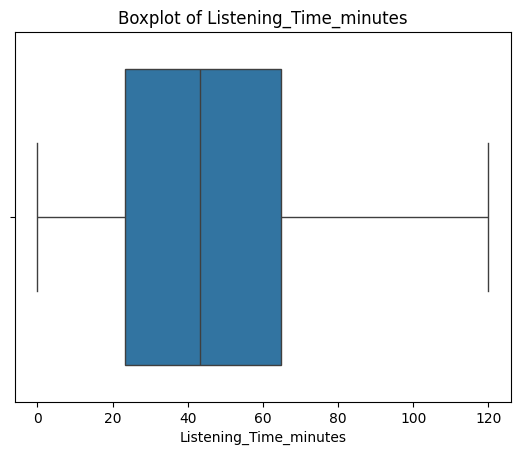

Lower Bound: -39.271685000000005, Upper Bound: 127.284195
Number of outliers: 453635    False
11651     False
431999    False
529211    False
110925    False
          ...  
259178    False
365838    False
131932    False
671155    False
121958    False
Name: Listening_Time_minutes, Length: 600000, dtype: bool


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=y_train)
plt.title('Boxplot of Listening_Time_minutes')
plt.show()

q1 = y_train.quantile(0.25)
q3 = y_train.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print(f"Number of outliers: {(y_train < lower_bound) | (y_train > upper_bound).sum()}")


There are no significant outliers.

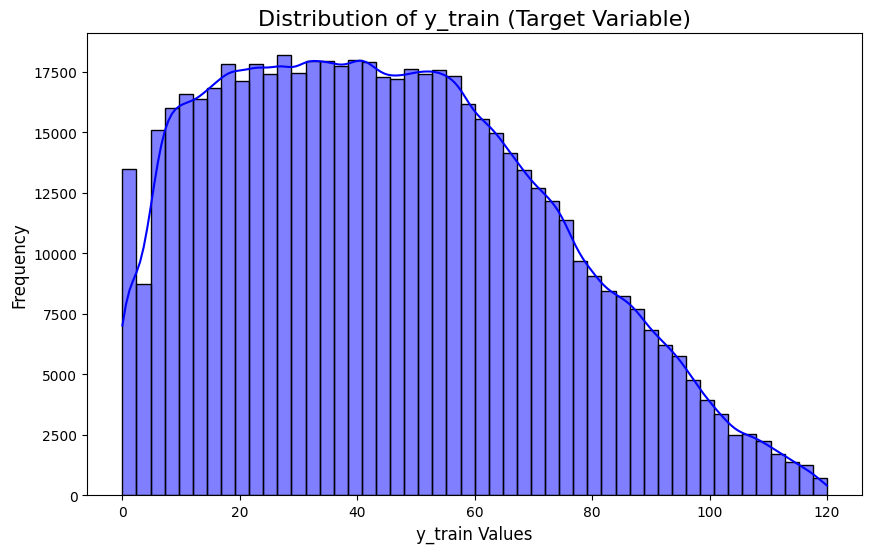

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram to check skew of y_train
plt.figure(figsize=(10, 6))
sns.histplot(y_train, bins=50, kde=True, color='blue')
plt.title("Distribution of y_train (Target Variable)", fontsize=16)
plt.xlabel("y_train Values", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

In [ ]:
import numpy as np

# Log transform
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

# Refit model with log-transformed target
pipeline.fit(X_train, y_train_log)
y_val_pred_log = pipeline.predict(X_val)

# Inverse transform predictions
y_val_pred = np.expm1(y_val_pred_log)

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_val, y_val_pred)
rmse = mean_squared_error(y_val, y_val_pred)

print(f"MAE after log-transform: {mae:.4f}")
print(f"RMSE after log-transform: {rmse:.4f}")


MAE after log-transform: 9.6496
RMSE after log-transform: 183.1588


The orignal non-transformed data works well than log transform.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import randint, uniform
from xgboost import XGBRegressor
import numpy as np

# Define hyperparameter space
param_distributions = {
    'model__n_estimators': randint(100, 300),
    'model__max_depth': randint(3, 10),
    'model__learning_rate': uniform(0.01, 0.2),
    'model__subsample': uniform(0.6, 0.4),
    'model__colsample_bytree': uniform(0.6, 0.4)
}

# RandomizedSearchCV for MAE
random_search_mae = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=15,
    cv=3,
    scoring='neg_mean_absolute_error',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit
random_search_mae.fit(X_train, y_train)

# Best MAE model
best_model_mae = random_search_mae.best_estimator_
y_pred = best_model_mae.predict(X_val)

# Metrics
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred)

print("Best Hyperparameters (MAE):")
for k, v in random_search_mae.best_params_.items():
    print(f"{k}: {v}")
print(f"\nMAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")


Fitting 3 folds for each of 15 candidates, totalling 45 fits


KeyboardInterrupt: 

In [ ]:

# # Use the best model from RandomizedSearchCV to predict test data
# y_test_pred_tuned = random_search_mae.best_estimator_.predict(df_test)
# print(y_test_pred_tuned)
# print(len(y_test_pred_tuned))

# # Round predictions to 3 decimal points
# y_test_pred_rounded_tuned = y_test_pred_tuned.round(3)

# # Create the submission DataFrame
# submission = pd.DataFrame({
#     'id': df_test['id'],
#     'Listening_Time_minutes': y_test_pred_rounded_tuned
# })

# # Save to CSV
# submission.to_csv('submission_2.csv', index=False)

# # Print basic info
# print(submission.shape)
# print(submission.head())


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import randint, uniform
import numpy as np

# Define a wider and more precise hyperparameter space
param_distributions_rmse = {
    'model__n_estimators': randint(200, 500),
    'model__max_depth': randint(3, 10),
    'model__learning_rate': uniform(0.01, 0.15),
    'model__subsample': uniform(0.6, 0.4),
    'model__colsample_bytree': uniform(0.6, 0.4),
    'model__gamma': uniform(0, 5),  # Added regularization
    'model__reg_alpha': uniform(0, 1),  # L1 regularization
    'model__reg_lambda': uniform(0.5, 1.5)  # L2 regularization
}

# RandomizedSearchCV for RMSE
random_search_rmse = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions_rmse,
    n_iter=5s,  # Increased for better search
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the randomized search
random_search_rmse.fit(X_train, y_train)

# Best RMSE model
best_model_rmse = random_search_rmse.best_estimator_
y_pred = best_model_rmse.predict(X_val)

# Evaluation Metrics
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred)

print(" Best Hyperparameters (RMSE):")
for k, v in random_search_rmse.best_params_.items():
    print(f"{k}: {v}")
print(f"\n MAE: {mae:.4f}")
print(f" RMSE: {rmse:.4f}")


Fitting 5 folds for each of 5 candidates, totalling 25 fits
 Best Hyperparameters (RMSE):
model__colsample_bytree: 0.996884623716487
model__gamma: 3.0874075481385828
model__learning_rate: 0.10174797407324213
model__max_depth: 7
model__n_estimators: 435
model__reg_alpha: 0.023062425041415757
model__reg_lambda: 1.2871619903875837
model__subsample: 0.7599443886861021

 MAE: 9.4115
 RMSE: 168.0519


In [ ]:
# Predict on test data using the best RMSE model
y_test_pred = best_model_rmse.predict(df_test)

# Round predictions to 3 decimal places
y_test_pred_rounded = y_test_pred.round(3)

# Create the submission DataFrame
submission = pd.DataFrame({
    'id': df_test['id'],  # Make sure your df_test includes 'id'
    'Listening_Time_minutes': y_test_pred_rounded
})

# Save to CSV
submission.to_csv('submission_best_rmse.csv', index=False)

# Print to confirm
print("Submission file created:")
print(submission.shape)
print(submission.head())


Submission file created:
(250000, 2)
       id  Listening_Time_minutes
0  750000               56.908001
1  750001               18.524000
2  750002               51.341999
3  750003               80.210999
4  750004               46.381001


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model_rmse, X, y, cv=5, scoring='neg_root_mean_squared_error')
print("CV RMSE:", -np.mean(scores))


CV RMSE: 13.000583560903427


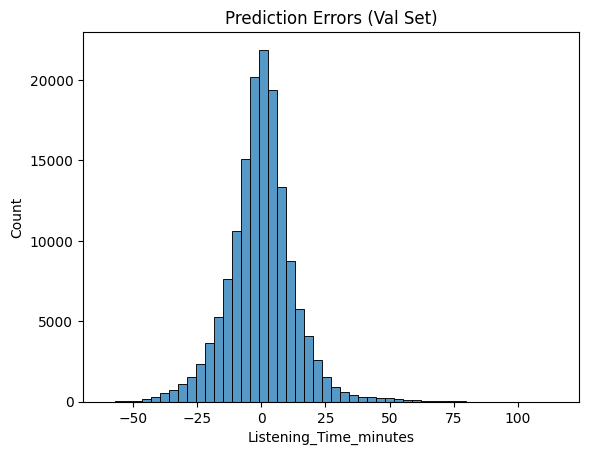

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

errors = y_val - y_pred
sns.histplot(errors, bins=50)
plt.title("Prediction Errors (Val Set)")
plt.show()
